In [2]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [3]:
df = pd.read_csv("/Users/Evan/Desktop/CCTopPosts.csv")

In [4]:
count = df.title.str.split(expand=True).stack().value_counts().rename_axis('unique_values').reset_index(name='counts')

In [5]:
count

,unique_values,counts
0,"'the',",379
1,"'to',",344
2,"'a',",224
3,"'of',",223
4,"'and',",204
...,...,...
5022,"'calls',",1
5023,"'Incorporate',",1
5024,"'Cult',",1
5025,'quorum.'],1


In [6]:
#Deletes everything but strings and digitis
countnew = count['unique_values'].str.replace(r'\W', '')

#Generates a Dataframe from Series Countnew
df2 = countnew.to_frame()

#Add new data column to original count DF
count['keyword'] = df2['unique_values']

#Drop messy keyword Data column
df3 = count.drop(axis=1, index=None, columns='unique_values')

#Make all keyword values lowercase
df3["keyword"] = df3["keyword"].str.lower()

#Add all duplicates and there values
df4 = df3.groupby(['keyword'],as_index=False).sum()

#Delete all digits form Keyword value 
df5 = df4[~df4.keyword.str.contains(r'\d')]


#Generates a Dataframe from Series df5
#df6 = df5.to_frame()

df5

,keyword,counts
0,,131
180,a,255
181,aave,1
182,abandon,2
183,ability,1
...,...,...
3065,yyy,1
3066,zcash,1
3067,zero,3
3068,zeroes,2


In [7]:
df6=df5[(df5['keyword']!= "a") &
        (df5['keyword']!= "to") &
        (df5['keyword']!= "of") &
        (df5['keyword']!= "for") &
        (df5['keyword']!= "in") &
        (df5['keyword']!= "the") &
        (df5['keyword']!= "your") &
        (df5['keyword']!= "and") &
        (df5['keyword']!= "you") &
        (df5['keyword']!= "my") &
        (df5['keyword']!= "i") &
        (df5['keyword']!= "your") &
        (df5['keyword']!= "from") &
        (df5['keyword']!= "with") &
        (df5['keyword']!= "do") &
        (df5['keyword']!= "or") &
        (df5['keyword']!= "what") &
        (df5['keyword']!= "it") &
        (df5['keyword']!= "") &
        (df5['keyword']!= "is") &
        (df5['keyword']!= "are") &
        (df5['keyword']!= "on") &
        (df5['keyword']!= "me") &
        (df5['keyword']!= "at") &
        (df5['keyword']!= "that") &
        (df5['keyword']!= "some") &
        (df5['keyword']!= "be") &
        (df5['keyword']!= "will") &
        (df5['keyword']!= "has") &
        (df5['keyword']!= "there") &
        (df5['keyword']!= "when") &
        (df5['keyword']!= "if") &
        (df5['keyword']!= "who") &
        (df5['keyword']!= "whats") &
        (df5['keyword']!= "have") &
        (df5['keyword']!= "should") &
        (df5['keyword']!= "how") &
        (df5['keyword']!= "does") &
        (df5['keyword']!= "over") &
        (df5['keyword']!= "any") &
        (df5['keyword']!= "now") &
        (df5['keyword']!= "those") &
        (df5['keyword']!= "here") &
        (df5['keyword']!= "le") &
        (df5['keyword']!= "as") &
        (df5['keyword']!= "vs") &
        (df5['keyword']!= "about") &
        (df5['keyword']!= "can") &
        (df5['keyword']!= "an") &
        (df5['keyword']!= "not") &
        (df5['keyword']!= "best") &
        (df5['keyword']!= "us") &
        (df5['keyword']!= "way") &
        (df5['keyword']!= "much") &
        (df5['keyword']!= "any") &
        (df5['keyword']!= "anyone") &
        (df5['keyword']!= "get") &
        (df5['keyword']!= "this") &
        (df5['keyword']!= "into") &
        (df5['keyword']!= "but") &
        (df5['keyword']!= "no") &
        (df5['keyword']!= "would") &
        (df5['keyword']!= "while") &
        (df5['keyword']!= "just") &
        (df5['keyword']!= "need") &
        (df5['keyword']!= "more") &
        (df5['keyword']!= "was") &
        (df5['keyword']!= "they") &
        (df5['keyword']!= "make") &
        (df5['keyword']!= "sure") &
        (df5['keyword']!= "their") &
        (df5['keyword']!= " ") &
        (df5['keyword']!= "only") &
        (df5['keyword']!= "eq") &
        (df5['keyword']!= "why") &
        (df5['keyword']!= "did") &
        (df5['keyword']!= "its") &
        (df5['keyword']!= "tangerine") &
        (df5['keyword']!= "wealthsimple") &
        (df5['keyword']!= "td") &
        (df5['keyword']!= "am") &
        (df5['keyword']!= "by") &
        (df5['keyword']!= "going") &
        (df5['keyword']!= "where") &
        (df5['keyword']!= "questtrade") &
        (df5['keyword']!= "use") &
        (df5['keyword']!= "cibc") &
        (df5['keyword']!= "i'm") &
        (df5['keyword']!= "using") &
        (df5['keyword']!= "been") &
        (df5['keyword']!= "back") &
        (df5['keyword']!= "second") &
        (df5['keyword']!= "still") &
        (df5['keyword']!= "which") &
        (df5['keyword']!= "im") &
        (df5['keyword']!= "been") &
        (df5['keyword']!= "too") &
        (df5['keyword']!= "dont") &
        (df5['keyword']!= "we") &
        (df5['keyword']!= "all") &
        (df5['keyword']!= "so") &
        (df5['keyword']!= "than") &
        (df5['keyword']!= "says") &
        (df5['keyword']!= "one") &
        (df5['keyword']!= "please") &
        (df5['keyword']!= "most") &
        (df5['keyword']!= "think") &
        (df5['keyword']!= "could") &
        (df5['keyword']!= "everyone") &
        (df5['keyword']!= "after") &
        (df5['keyword']!= "were") &
        (df5['keyword']!= "daily") &
        (df5['keyword']!= "know") &
        (df5['keyword']!= "our") &
        (df5['keyword']!= "take") &
        (df5['keyword']!= "someone") &
        (df5['keyword']!= "being") &
        (df5['keyword']!= "see") 
       ]

In [8]:
df7 = df6.sort_values(by=['counts'], ascending = False)
df7

,keyword,counts
769,crypto,297
444,bitcoin,114
432,bill,43
1852,new,38
1012,eth,35
...,...,...
1372,horror,1
1371,horrible,1
1369,hoping,1
1368,hopefully,1


In [9]:
df7.to_csv(r'/Users/Evan/Desktop/CCtestdata.csv', index = False)


In [12]:
df7top = df7.head(150)

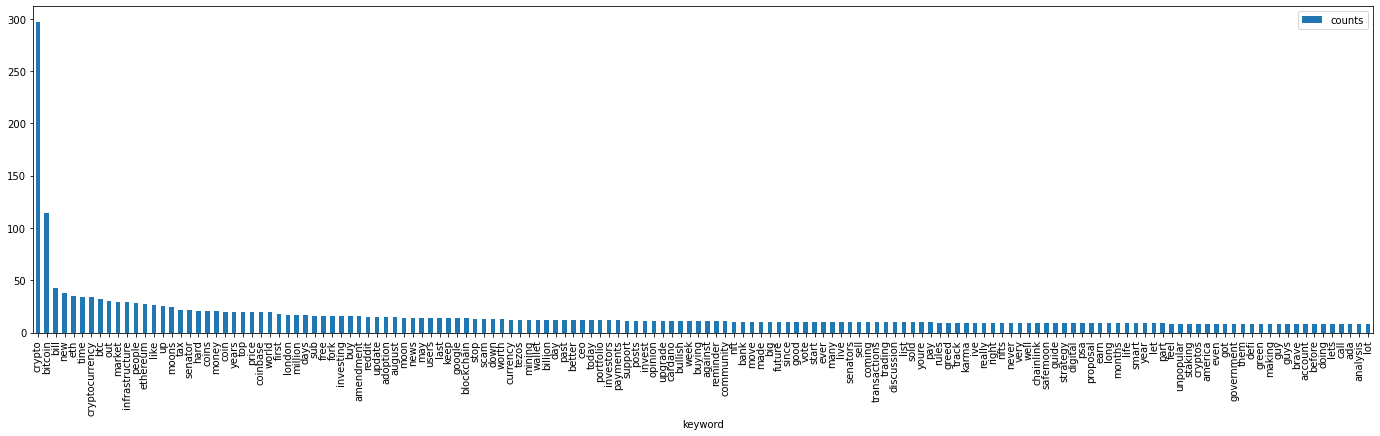

In [13]:
df7chart = df7top.plot(kind='bar',x='keyword',y='counts', figsize=(24, 6))

In [14]:
data = dict(zip(df7top['keyword'].tolist(), df7top['counts'].tolist()))

In [15]:
wc = WordCloud(background_color='white', width=800, height=800, max_words=200).generate_from_frequencies(data)

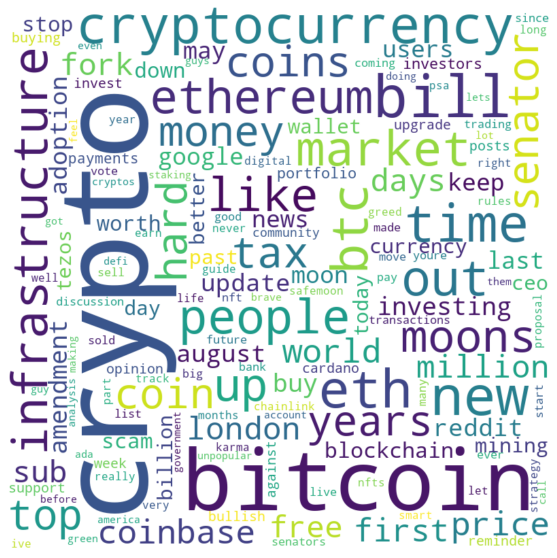

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 999.5, 999.5, -0.5)

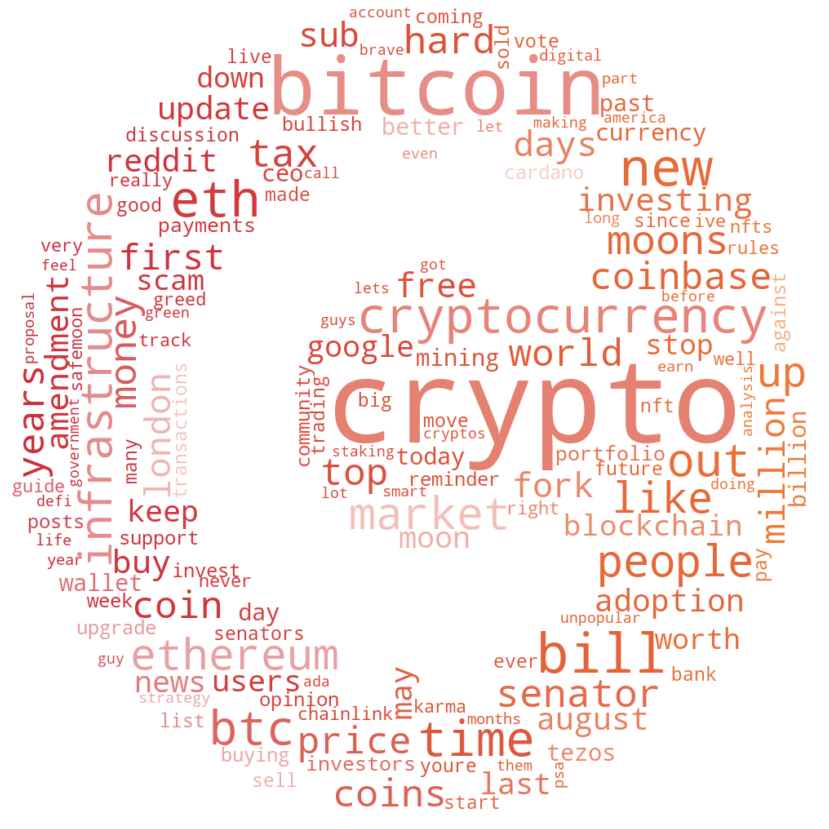

In [18]:
CClogo_mask = np.array(Image.open('/Users/Evan/Desktop/Untitled-1.png'))
wc = WordCloud(background_color='white',mode="RGBA", width=1200, height=800, max_words=200, mask=CClogo_mask).generate_from_frequencies(data)

image_colors = ImageColorGenerator(CClogo_mask)
plt.figure(figsize=(15, 15))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")

In [20]:
wc.to_file("/Users/Evan/Desktop/WordcloudCC.png")

In [ ]:
canada_mask = np.array(Image.open('/Users/Evan/Desktop/Key Base Finacial Internship/Keybase/Keybase Digital Assets/blackflag.png'))
wc1 = WordCloud(background_color='white',mode="RGBA", width=1200, height=800, max_words=200, mask=canada_mask).generate_from_frequencies(data)

image_colors = ImageColorGenerator(canada_mask)
plt.figure(figsize=(15, 15))
plt.imshow(wc1.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")

In [ ]:
wc1.to_file("/Users/Evan/Desktop/untitled folder/Wordcloudtest.png")

In [ ]:
WeeklyTopTen = df7.head(10)
WeeklyTopTen = WeeklyTopTen.reset_index()
WeeklyTopTen = WeeklyTopTen.drop(columns='index')
WeeklyTopTen